# Bikesharing 2022

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


## Read dataset

In [2]:
# Import csv file previously cleaned in MySQL

trips = pd.read_csv('trips_combined.csv', na_values='null')
trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,user_type,started_day,started_month,trip_duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,Thursday,January,2
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,Monday,January,4
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,Tuesday,January,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,Tuesday,January,14
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,Thursday,January,6


In [3]:
# Glimpse of the dataset
trips.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440114 entries, 0 to 5440113
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   ride_id             5440114 non-null  object
 1   rideable_type       5440114 non-null  object
 2   started_at          5440114 non-null  object
 3   ended_at            5440114 non-null  object
 4   start_station_name  4224063 non-null  object
 5   end_station_name    4224063 non-null  object
 6   user_type           5440114 non-null  object
 7   started_day         5440114 non-null  object
 8   started_month       5440114 non-null  object
 9   trip_duration       5440114 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 415.0+ MB


In [4]:
# Modify data types so all date are in the correct datetime format
trips['started_at'] = pd.to_datetime(trips['started_at'], format='%Y-%m-%d %H:%M:%S')
trips['ended_at'] = pd.to_datetime(trips['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [5]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440114 entries, 0 to 5440113
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   user_type           object        
 7   started_day         object        
 8   started_month       object        
 9   trip_duration       int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 415.0+ MB


In [41]:
# Some preliminary summary descriptions
summary_objects = pd.DataFrame(trips.describe(include=['object']))
summary_objects

,ride_id,rideable_type,start_station_name,end_station_name,user_type,started_day,started_month,started_date,day_type
count,5440114,5440114,4224063,4224063,5440114,5440114,5440114,5440114,5440114
unique,5440114,3,1533,1573,2,7,12,365,2
top,C2F7DD78E82EC875,electric_bike,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,member,Saturday,July,2022-07-09,Weekday
freq,1,2747979,69161,70438,3199278,880547,791787,34798,3814264


In [43]:
summary_numbers = pd.DataFrame(trips.describe())
summary_numbers

,trip_duration,started_hour
count,5.440114e+06,5.440114e+06
mean,1.640330e+01,1.423230e+01
std,2.981338e+01,5.022882e+00
min,2.000000e+00,0.000000e+00
25%,6.000000e+00,1.100000e+01
50%,1.000000e+01,1.500000e+01
75%,1.800000e+01,1.800000e+01
max,1.440000e+03,2.300000e+01


## Charts

### Trip count by month

Text(0.25, 1.05, 'Ride Count by User Type and Month')

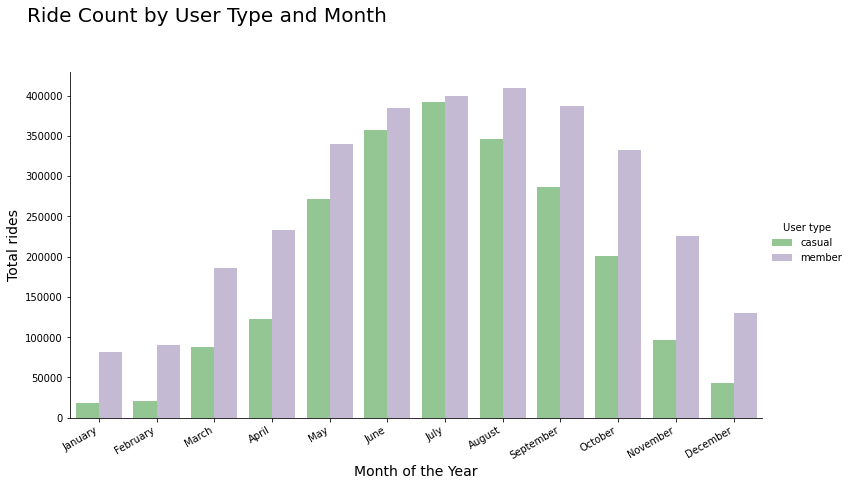

In [100]:
# Charts
# Trip count by user type and month

p = sns.catplot(data=trips, kind='count', x='started_month', hue='user_type', height=6, aspect=1.8, alpha=0.9, palette='Accent')
#p.set(xlabel='Month of the Year', ylabel='Total rides')
p.set_xticklabels(rotation=30, ha='right')
p.set_axis_labels("Month of the Year", "Total rides", fontsize=14)
  #.set_titles("{col_name}")
  #.despine(left=True)) 
p._legend.set_title('User type')
p.fig.subplots_adjust(top=0.9),
p.fig.suptitle('Ride Count by User Type and Month', fontsize=20, x=0.25, y=1.05)

In [46]:
#Make a pivot table to see the aggregation 
month_order = ['January', 'February', 'March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_count_bymonth = pd.pivot_table(trips, values='ride_id', index='user_type', columns='started_month', aggfunc='count')
pivot_count_bymonth.reindex(columns=month_order)


started_month,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
casual,17883,20695,87335,122630,271621,356948,391764,345850,285946,200720,96625,42819
member,81706,89803,185711,233094,339653,384600,400023,409223,387155,333012,225662,129636


### Trip count by day of the week

In [11]:
trips['started_date'] = trips['started_at'].dt.date
trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,user_type,started_day,started_month,trip_duration,started_hour,started_date
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,Thursday,January,2,11,2022-01-13
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,Monday,January,4,8,2022-01-10
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,Tuesday,January,4,4,2022-01-25
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,Tuesday,January,14,0,2022-01-04
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,Thursday,January,6,1,2022-01-20


In [12]:
# To plot average for each day of the week, we need to make a groupby to calculate the count and mean. 

days = pd.DataFrame(trips.groupby(['user_type','started_day','started_date']).size().reset_index(name='count'))
days

,user_type,started_day,started_date,count
0,casual,Friday,2022-01-07,392
1,casual,Friday,2022-01-14,908
2,casual,Friday,2022-01-21,783
3,casual,Friday,2022-01-28,277
4,casual,Friday,2022-02-04,463
...,...,...,...,...
725,member,Wednesday,2022-11-30,5954
726,member,Wednesday,2022-12-07,8235
727,member,Wednesday,2022-12-14,3265
728,member,Wednesday,2022-12-21,4586


Text(0.25, 1.05, 'Ride Count by User Type and Day of the Week')

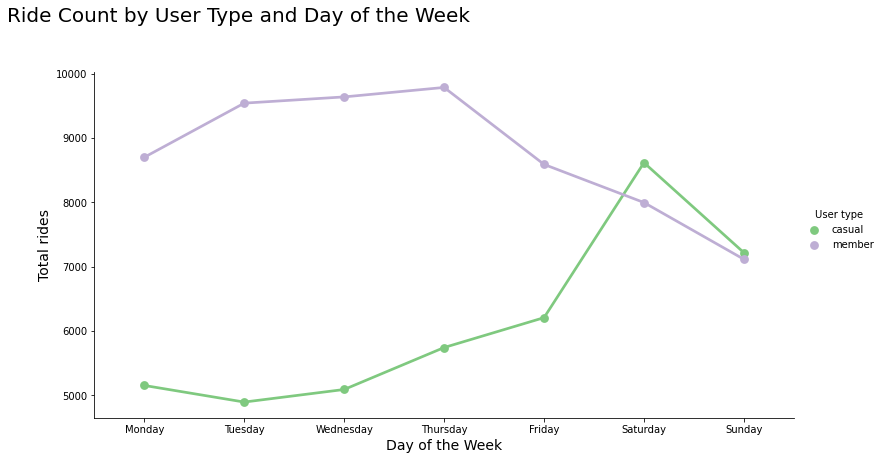

In [99]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = sns.catplot(data=days, kind='point', x='started_day', y='count', hue='user_type', ci=None, order=order, height=6, aspect=1.8, alpha=0.9, palette='Accent')
#x.set(xlabel='Day of the Week', ylabel='Avg ride count')
#x.set_xticklabels(rotation=30, ha='right')
x.set_axis_labels("Day of the Week", "Total rides", fontsize=14)
  #.set_titles("{col_name}")
  #.despine(left=True))  
x._legend.set_title('User type')
x.fig.subplots_adjust(top=0.9),
x.fig.suptitle('Ride Count by User Type and Day of the Week', fontsize=20, x=0.25, y=1.05)


In [54]:
#Make a pivot table to see the aggregation 
#day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_count_byday = pd.pivot_table(days, values='count', index='user_type', columns='started_day', aggfunc='mean')
pivot_count_byday.reindex(columns=order).round(2)


started_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
user_type,,,,,,,
casual,5153.94,4895.69,5091.35,5743.52,6208.08,8616.89,7217.83
member,8700.83,9542.23,9639.25,9786.37,8589.98,7997.21,7114.92


### Trip count by hour

In [10]:
# Group by hours of the day
# Extract hour from column started_at
trips['started_hour'] = trips['started_at'].dt.hour
trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,user_type,started_day,started_month,trip_duration,started_hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,Thursday,January,2,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,Monday,January,4,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,Tuesday,January,4,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,Tuesday,January,14,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,Thursday,January,6,1


In [17]:
#Group by
hours = pd.DataFrame(trips.groupby(['user_type','started_day','started_hour']).size().reset_index(name='count'))
hours

,user_type,started_day,started_hour,count
0,casual,Friday,0,5310
1,casual,Friday,1,3209
2,casual,Friday,2,1857
3,casual,Friday,3,1175
4,casual,Friday,4,852
...,...,...,...,...
331,member,Wednesday,19,32848
332,member,Wednesday,20,23177
333,member,Wednesday,21,17640
334,member,Wednesday,22,12711


Text(0.25, 1.05, 'Ride Count by User Type and Hour of the day')

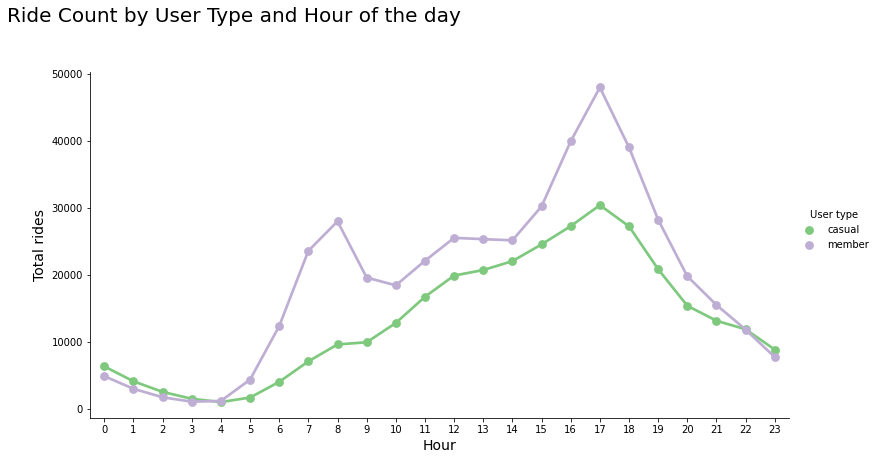

In [101]:
h = sns.catplot(data=hours, x='started_hour', y='count', kind='point', hue='user_type', 
                ci=None, height=6, aspect=1.8, palette='Accent')
#h.set_xticklabels(rotation=30, ha='right')
h.set_axis_labels("Hour", "Total rides", fontsize=14)
  #.set_titles("{col_name}")
  #.despine(left=True))  
h._legend.set_title('User type')
h.fig.subplots_adjust(top=0.9),
h.fig.suptitle('Ride Count by User Type and Hour of the day', fontsize=20, x=0.25, y=1.05)

In [19]:
# Adding a categorical column indicating weekday or weekend
hours['day_type'] = hours['started_day'].apply(lambda x: 'Weekday' 
                                               if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 
                                               else 'Weekend')

In [20]:
hours.head()

,user_type,started_day,started_hour,count,day_type
0,casual,Friday,0,5310,Weekday
1,casual,Friday,1,3209,Weekday
2,casual,Friday,2,1857,Weekday
3,casual,Friday,3,1175,Weekday
4,casual,Friday,4,852,Weekday


Text(0.25, 1.05, 'Ride Count by User Type and Hour')

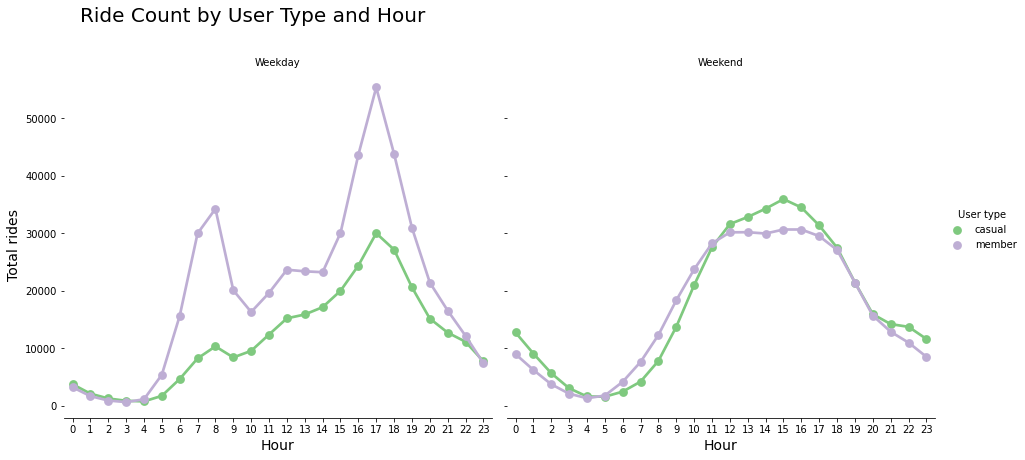

In [102]:
g = sns.catplot(data=hours, x='started_hour', y='count', kind='point', hue='user_type', 
                ci=None, height=6, aspect=1.1, col='day_type', palette='Accent')
#g.set_xticklabels(rotation=30, ha='right')
(g.set_axis_labels("Hour", "Total rides", fontsize=14)
  .set_titles("{col_name}")
  .despine(left=True))  
g._legend.set_title('User type')
g.fig.subplots_adjust(top=0.9),
g.fig.suptitle('Ride Count by User Type and Hour', fontsize=20, x=0.25, y=1.05)

In [62]:
#Make a pivot table to see the aggregation 
pivot_count_byhour = pd.pivot_table(hours, values='count', index='started_hour', columns=['day_type', 'user_type'], aggfunc='mean')
#pivot_count_byhour.reindex(columns=order).round(2)
pivot_count_byhour.round(2)

day_type      Weekday           Weekend         
user_type      casual   member   casual   member
started_hour                                    
0              3781.2   3247.6  12774.0   9013.0
1              2134.0   1707.8   9110.0   6259.0
2              1293.6    936.8   5694.5   3763.5
3               893.2    669.8   3078.0   2131.5
4               787.4   1150.6   1641.5   1339.5
5              1749.0   5420.6   1604.0   1800.0
6              4678.8  15655.6   2485.0   4196.0
7              8262.8  29994.6   4225.0   7649.0
8             10356.2  34278.4   7835.5  12338.5
9              8432.4  20112.6  13764.5  18371.5
10             9573.0  16331.4  21011.5  23755.5
11            12417.2  19659.8  27586.0  28280.5
12            15230.4  23686.0  31628.5  30187.5
13            15899.0  23408.0  32856.0  30211.5
14            17175.0  23253.6  34302.5  29979.5
15            20014.2  30071.8  35966.0  30680.0
16            24405.2  43668.8  34513.5  30679.5
17            30037.4  55386.6  31386.0  29529.5
18            27171.2  43817.8  27517.0  27126.5
19            20629.2  30982.0  21450.5  21462.5
20            15189.2  21456.4  15952.0  15707.5
21            12748.0  16582.0  14227.5  12901.0
22            11155.2  12188.8  13753.5  11007.0
23             7750.0   7422.6  11648.5   8544.5

### Trip duration by month

Text(0.25, 1.05, 'Avg Trip Duration by User Type and Month')

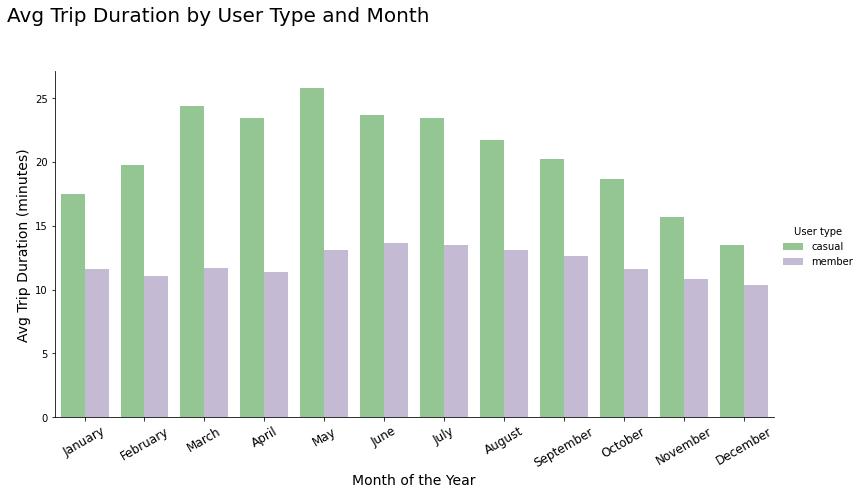

In [103]:
# Charts
# Trip duration by user type and month

u = sns.catplot(data=trips, kind='bar', x='started_month', y='trip_duration', hue='user_type', 
                ci=None, height=6, aspect=1.8, alpha=0.9, palette='Accent')
#u.set(xlabel='Month of the Year', ylabel='Average Trip duration')
u.set_xticklabels(rotation=30, ha='center', fontsize=12)
u.set_axis_labels("Month of the Year", "Avg Trip Duration (minutes)", fontsize=14)
 # .set_titles("{col_name}")
  #.despine(left=True))  
u._legend.set_title('User type')
u.fig.subplots_adjust(top=0.9),
u.fig.suptitle('Avg Trip Duration by User Type and Month', fontsize=20, x=0.25, y=1.05)

In [60]:
#Make a pivot table

pivot_dur_bymonth = pd.pivot_table(trips, values='trip_duration', index='user_type', columns='started_month', aggfunc='mean')
pivot_dur_bymonth.reindex(columns=month_order).round(2)


started_month,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
casual,17.46,19.75,24.35,23.39,25.79,23.62,23.46,21.72,20.24,18.68,15.65,13.49
member,11.58,11.03,11.68,11.36,13.08,13.66,13.47,13.11,12.66,11.57,10.86,10.37


### Trip duration by day of the week

Text(0.3, 1.05, 'Avg Trip Duration by User Type and Day of the Week')

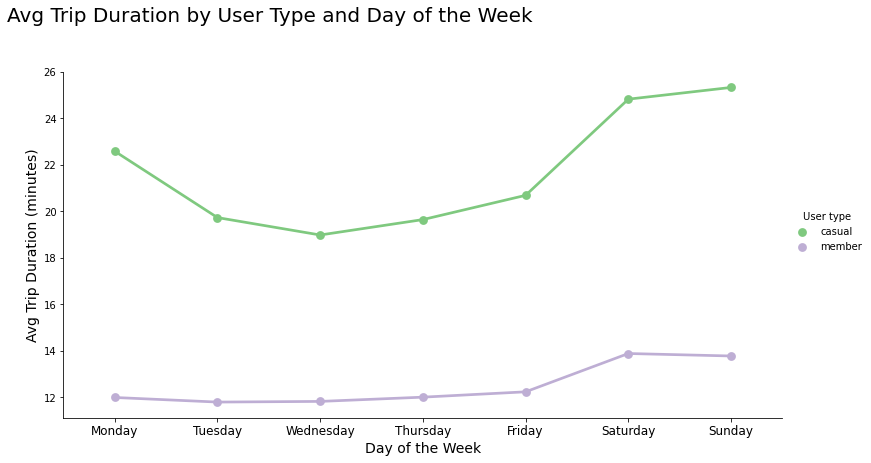

In [105]:
# Trip duration by user type and day of the week

v = sns.catplot(data=trips, kind='point', x='started_day', y='trip_duration', hue='user_type', order=order,
                ci=None, height=6, aspect=1.8, alpha=0.9, palette='Accent')
#v.set(xlabel='Day of the Week', ylabel='Average Trip duration')
v.set_xticklabels(rotation=0, ha='center', fontsize=12)
v.set_axis_labels("Day of the Week", "Avg Trip Duration (minutes)", fontsize=14)
  #.set_titles("{col_name}")
  #.despine(left=True))  
v._legend.set_title('User type')
v.fig.subplots_adjust(top=0.9),
v.fig.suptitle('Avg Trip Duration by User Type and Day of the Week', fontsize=20, x=0.30, y=1.05)

In [63]:
#Make a pivot table

pivot_dur_byday = pd.pivot_table(trips, values='trip_duration', index='user_type', columns='started_day', aggfunc='mean')
pivot_dur_byday.reindex(columns=order).round(2)


started_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
user_type,,,,,,,
casual,22.58,19.73,18.98,19.64,20.68,24.82,25.32
member,11.99,11.79,11.82,12.00,12.23,13.88,13.77


### Trip duration by hour

Text(0.25, 1.05, 'Avg Trip Duration by User Type and Hour')

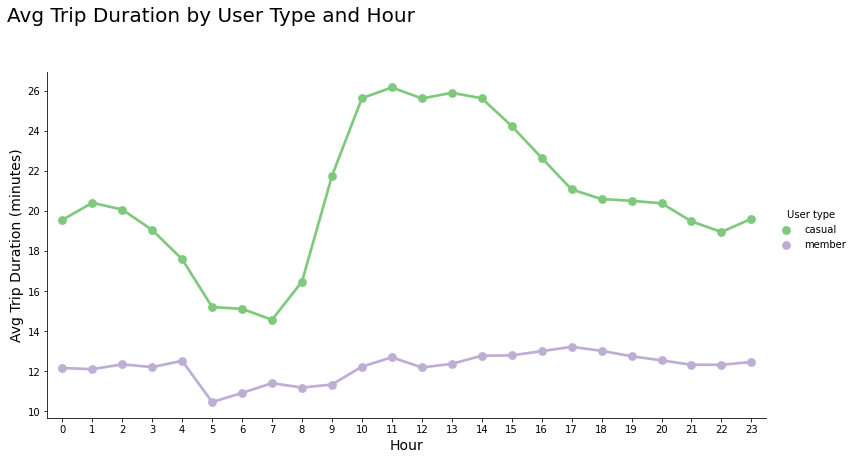

In [106]:
# Trip duration by user type and hour of the day

w = sns.catplot(data=trips, kind='point', x='started_hour', y='trip_duration', hue='user_type',
                ci=None, height=6, aspect=1.8, alpha=0.9, palette='Accent')
#w.set(xlabel='Hour', ylabel='Average Trip duration')
#w.set_xticklabels(rotation=30, ha='center')
w.set_axis_labels("Hour", "Avg Trip Duration (minutes)", fontsize=14)
  #.set_titles("{col_name}")
  #.despine(left=True))  
w._legend.set_title('User type')
w.fig.subplots_adjust(top=0.9),
w.fig.suptitle('Avg Trip Duration by User Type and Hour', fontsize=20, x=0.25, y=1.05)

In [36]:
# Adding a categorical column indicating weekday or weekend to the trips table
trips['day_type'] = trips['started_day'].apply(lambda x: 'Weekday' 
                                               if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 
                                               else 'Weekend')

In [37]:
trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,user_type,started_day,started_month,trip_duration,started_hour,started_date,day_type
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,Thursday,January,2,11,2022-01-13,Weekday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,Monday,January,4,8,2022-01-10,Weekday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,Tuesday,January,4,4,2022-01-25,Weekday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,Tuesday,January,14,0,2022-01-04,Weekday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,member,Thursday,January,6,1,2022-01-20,Weekday


Text(0.25, 1.05, 'Avg Trip Duration by User Type and Hour')

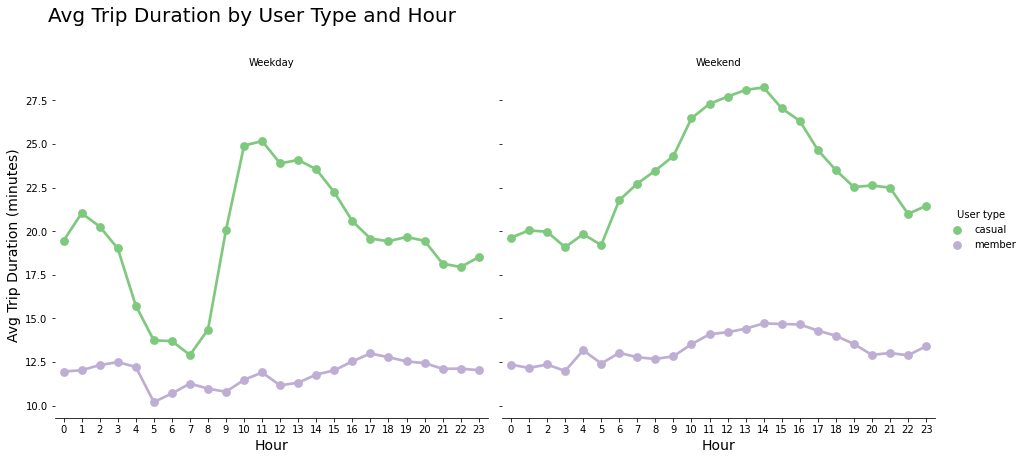

In [107]:

z = sns.catplot(data=trips, kind='point', x='started_hour', y='trip_duration', hue='user_type', col='day_type',
                ci=None, height=6, aspect=1.1, alpha=0.9, palette='Accent')
#z.set(xlabel='Hour', ylabel='Average Trip duration')
(z.set_axis_labels("Hour", "Avg Trip Duration (minutes)", fontsize=14)
  .set_titles("{col_name}")
  .despine(left=True))  
z._legend.set_title('User type')
z.fig.subplots_adjust(top=0.9),
z.fig.suptitle('Avg Trip Duration by User Type and Hour', fontsize=20, x=0.25, y=1.05)

In [64]:
#Make a pivot table to see the aggregation 
pivot_dur_byhour = pd.pivot_table(trips, values='trip_duration', index='started_hour', columns=['day_type', 'user_type'], aggfunc='mean')
pivot_dur_byhour.round(2)

day_type     Weekday        Weekend       
user_type     casual member  casual member
started_hour                              
0              19.46  11.96   19.63  12.36
1              21.03  12.03   20.05  12.16
2              20.27  12.33   19.97  12.36
3              19.01  12.50   19.08  11.99
4              15.73  12.22   19.83  13.18
5              13.74  10.21   19.21  12.42
6              13.70  10.70   21.78  13.03
7              12.91  11.27   22.73  12.78
8              14.36  10.98   23.48  12.68
9              20.08  10.80   24.31  12.83
10             24.90  11.48   26.47  13.52
11             25.17  11.90   27.30  14.09
12             23.88  11.16   27.71  14.21
13             24.09  11.32   28.10  14.42
14             23.55  11.78   28.24  14.72
15             22.23  12.03   27.04  14.68
16             20.57  12.54   26.33  14.66
17             19.58  12.99   24.66  14.30
18             19.42  12.78   23.50  14.01
19             19.67  12.54   22.53  13.53
20             19.45  12.44   22.62  12.91
21             18.14  12.11   22.49  13.02
22             17.95  12.13   20.99  12.89
23             18.51  12.03   21.45  13.41

## Insights

1. During the summer months, when the average temperature ranges from 15 to 19 degrees, there is an increase in the number of trips.
2. On Fridays, Saturdays, and Sundays, there is an increase in the number of trips by casual users.
3. On the other hand, there is a decrease in the number of trips by members on Fridays, Saturdays, and Sundays.
4. During the week, there is an increase in the number of trips by member users during peak hours, specifically between 7-8am and 5-6pm.
5. The average duration of trips for member users remains relatively stable throughout the year. However, for casual users, it reaches its peak in the spring months (from April to June) and then begins to decrease.
6. The average duration of trips varies little for member users throughout the week. However, in the case of casual users, an increase of up to 5 minutes is observed on weekends.
7. During weekdays, from Monday to Friday, the average duration of trips for member users does not show significant variations. For casual users, the average duration reaches its minimum at around 7am and its maximum between 10am and 12pm.
8. On Saturdays and Sundays, member users show a stable behavior throughout the day. In contrast, casual users show an increase in the duration of trips starting at 7 am, reaching a peak at 1 pm, and then starting to decrease.